In [69]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import time
from scipy.fft import fft, fftfreq, rfft, rfftfreq
import matplotlib.pyplot as plt

In [70]:
input_df = pd.read_csv('../../Data/Input v2.csv', sep=';')
input_df

,DATA,corrente_neutro,corrente_f1,corrente_f2,corrente_f3,tensao_f1,tensao_f2,tensao_f3
0,23/03/2022 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23/03/2022 10:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23/03/2022 10:59,9.53,4.16,3.35,2.02,254.2,254.0,254.1
3,23/03/2022 10:59,9.56,4.17,3.35,2.03,254.1,253.9,254.0
4,23/03/2022 10:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
601,23/03/2022 07:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,23/03/2022 07:31,9.44,4.12,3.33,1.98,252.1,251.8,251.8
603,23/03/2022 07:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,23/03/2022 07:30,9.36,4.07,3.34,1.95,251.8,251.6,251.6


In [71]:
input_df.dropna(inplace=True)

In [72]:
sns.pairplot(data=input_df)

In [73]:
px.histogram(input_df, x='corrente_neutro')

In [74]:
validacao_df = pd.read_csv('../../Data/Validação v2.csv', encoding='unicode_escape', header=[0,1], sep=';')
validacao_df

,Unnamed: 0_level_0,Kwh (Consumo),Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,kVAh,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,kvarh,...,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,ºC,V,Unnamed: 31_level_0,Unnamed: 32_level_0,º,Unnamed: 34_level_0,Unnamed: 35_level_0
,Data,energia_ativa_f1,energia_ativa_f2,energia_ativa_f3,energia_ativa_total,energia_aparente_f1,energia_aparente_f2,energia_aparente_f3,energia_aparente_total,energia_reativa_f2,...,potencia_reativa_f2,potencia_reativa_f3,potencia_reativa_total,temperatura,tensao_f1_f2,tensao_f2_f3,tensao_f3_f1,angulo_tensao_f1,angulo_tensao_f2,angulo_tensao_f3
0,23/03/2022 10:59,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,711,-86,953,24,"440,29","439,94","440,11",0.0,119.7,-120.1
1,23/03/2022 10:59,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,709,-89,950,24,"440,11","439,77","439,94",0.0,119.7,-120.1
2,23/03/2022 10:58,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,700,-83,948,24,"440,11","439,77","439,94",0.0,119.7,-120.0
3,23/03/2022 10:57,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,691,-86,950,24,"439,59","439,07","439,59",0.0,119.7,-120.0
4,23/03/2022 10:56,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,685,-80,940,24,"438,38","438,04","438,56",0.0,119.8,-119.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,23/03/2022 07:03,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,704,-68,988,25,"437,86","437,69","437,69",NaN,NaN,NaN
253,23/03/2022 07:02,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,702,-57,1001,25,"436,3","435,96","435,96",NaN,NaN,NaN
254,23/03/2022 07:01,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,692,-82,928,26,"437,17","437,17",437,NaN,NaN,NaN


In [75]:
validacao_df.columns = ['_'.join(col) for col in validacao_df.columns]

In [76]:
validacao_df.columns

Index(['Unnamed: 0_level_0_Data', 'Kwh (Consumo)_energia_ativa_f1',
       'Unnamed: 2_level_0_energia_ativa_f2',
       'Unnamed: 3_level_0_energia_ativa_f3',
       'Unnamed: 4_level_0_energia_ativa_total', 'kVAh_energia_aparente_f1',
       'Unnamed: 6_level_0_energia_aparente_f2',
       'Unnamed: 7_level_0_energia_aparente_f3',
       'Unnamed: 8_level_0_energia_aparente_total', 'kvarh_energia_reativa_f2',
       'Unnamed: 10_level_0_energia_reativa_f1',
       'Unnamed: 11_level_0_energia_reativa_f3',
       'Unnamed: 12_level_0_energia_reativa_total',
       'Unnamed: 13_level_0_fator_potencia_f1',
       'Unnamed: 14_level_0_fator_potencia_f2',
       'Unnamed: 15_level_0_fator_potencia_f3',
       'Unnamed: 16_level_0_Fator_Potencia_Total', 'VA_potencia_aparente_f1',
       'Unnamed: 18_level_0_potencia_aparente_f2',
       'Unnamed: 19_level_0_potencia_aparente_f3',
       'Unnamed: 20_level_0_potencia_aparente_total', 'W_potencia_ativa_f1',
       'Unnamed: 22_level_0_potenc

In [77]:
validacao_df.columns = ['DATA','energia_ativa_f1 Kwh (Consumo)',
       'energia_ativa_f2 Kwh (Consumo)',
       'energia_ativa_f3 Kwh (Consumo)',
       'energia_ativa_total Kwh (Consumo)', 
       'energia_aparente_f1 kVAh',
       'energia_aparente_f2 kVAh',
       'energia_aparente_f3 kVAh',
       'energia_aparente_total kVAh',
       'energia_reativa_f2 kvarh',
       'energia_reativa_f1 kvarh',
       'energia_reativa_f3 kvarh',
       'energia_reativa_total kvarh',
       'fator_potencia_f1 kvarh',
       'fator_potencia_f2 kvarh',
       'fator_potencia_f3 kvarh',
       'Fator_Potencia_Total kvarh', 
       'potencia_aparente_f1 VA',
       'potencia_aparente_f2 VA',
       'potencia_aparente_f3 VA',
       'potencia_aparente_total VA',
       'potencia_ativa_f1 W',
       'potencia_ativa_f2 W',
       'potencia_ativa_f3 W',
       'potencia_ativa_total W', 
       'potencia_reativa_f1 var',
       'potencia_reativa_f2 var',
       'potencia_reativa_f3 var',
       'potencia_reativa_total var',
       'temperatura ºC',
       'tensao_f1_f2 V',
       'tensao_f2_f3 V',
       'tensao_f3_f1 V',
       'angulo_tensao_f1 º',
       'angulo_tensao_f2 º',
       'angulo_tensao_f3 º']

In [78]:
validacao_df.drop_duplicates()

,DATA,energia_ativa_f1 Kwh (Consumo),energia_ativa_f2 Kwh (Consumo),energia_ativa_f3 Kwh (Consumo),energia_ativa_total Kwh (Consumo),energia_aparente_f1 kVAh,energia_aparente_f2 kVAh,energia_aparente_f3 kVAh,energia_aparente_total kVAh,energia_reativa_f2 kvarh,...,potencia_reativa_f2 var,potencia_reativa_f3 var,potencia_reativa_total var,temperatura ºC,tensao_f1_f2 V,tensao_f2_f3 V,tensao_f3_f1 V,angulo_tensao_f1 º,angulo_tensao_f2 º,angulo_tensao_f3 º
0,23/03/2022 10:59,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,711,-86,953,24,"440,29","439,94","440,11",0.0,119.7,-120.1
1,23/03/2022 10:59,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,709,-89,950,24,"440,11","439,77","439,94",0.0,119.7,-120.1
2,23/03/2022 10:58,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,700,-83,948,24,"440,11","439,77","439,94",0.0,119.7,-120.0
3,23/03/2022 10:57,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,691,-86,950,24,"439,59","439,07","439,59",0.0,119.7,-120.0
4,23/03/2022 10:56,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,685,-80,940,24,"438,38","438,04","438,56",0.0,119.8,-119.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,23/03/2022 07:03,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,704,-68,988,25,"437,86","437,69","437,69",NaN,NaN,NaN
253,23/03/2022 07:02,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,702,-57,1001,25,"436,3","435,96","435,96",NaN,NaN,NaN
254,23/03/2022 07:01,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,692,-82,928,26,"437,17","437,17",437,NaN,NaN,NaN
255,23/03/2022 07:01,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,690,-61,1000,26,"437,69","437,52","437,52",NaN,NaN,NaN


In [79]:
validacao_df.isna().sum(), validacao_df.shape

(DATA                                  0
 energia_ativa_f1 Kwh (Consumo)        0
 energia_ativa_f2 Kwh (Consumo)        0
 energia_ativa_f3 Kwh (Consumo)        0
 energia_ativa_total Kwh (Consumo)     0
 energia_aparente_f1 kVAh              0
 energia_aparente_f2 kVAh              0
 energia_aparente_f3 kVAh              0
 energia_aparente_total kVAh           0
 energia_reativa_f2 kvarh              0
 energia_reativa_f1 kvarh              0
 energia_reativa_f3 kvarh              0
 energia_reativa_total kvarh           0
 fator_potencia_f1 kvarh               0
 fator_potencia_f2 kvarh               0
 fator_potencia_f3 kvarh               0
 Fator_Potencia_Total kvarh            0
 potencia_aparente_f1 VA               0
 potencia_aparente_f2 VA               0
 potencia_aparente_f3 VA               0
 potencia_aparente_total VA            0
 potencia_ativa_f1 W                   0
 potencia_ativa_f2 W                   0
 potencia_ativa_f3 W                   0
 potencia_ativa_

In [80]:
input_df.isna().sum(), input_df.shape

(DATA               0
 corrente_neutro    0
 corrente_f1        0
 corrente_f2        0
 corrente_f3        0
 tensao_f1          0
 tensao_f2          0
 tensao_f3          0
 dtype: int64,
 (225, 8))

In [81]:
indx = input_df.loc[input_df.DATA.isin(validacao_df.DATA)].index
#input_df.loc[~input_df.DATA.isin(validacao_df.DATA)]
idx = validacao_df.loc[validacao_df.DATA.isin(input_df.DATA)].index
validacao_df.loc[~validacao_df.DATA.isin(input_df.DATA)]

,DATA,energia_ativa_f1 Kwh (Consumo),energia_ativa_f2 Kwh (Consumo),energia_ativa_f3 Kwh (Consumo),energia_ativa_total Kwh (Consumo),energia_aparente_f1 kVAh,energia_aparente_f2 kVAh,energia_aparente_f3 kVAh,energia_aparente_total kVAh,energia_reativa_f2 kvarh,...,potencia_reativa_f2 var,potencia_reativa_f3 var,potencia_reativa_total var,temperatura ºC,tensao_f1_f2 V,tensao_f2_f3 V,tensao_f3_f1 V,angulo_tensao_f1 º,angulo_tensao_f2 º,angulo_tensao_f3 º
225,23/03/2022 07:29,"0,004",0,"0,001","0,006","0,006","0,004","0,003","0,013","0,004",...,682,-55,1013,25,"435,96","435,61","435,61",NaN,NaN,NaN
226,23/03/2022 07:28,"0,002",0,"0,001","0,003","0,004","0,003","0,003","0,009","0,001",...,227,-88,353,25,"436,48","436,13","435,96",NaN,NaN,NaN
227,23/03/2022 07:27,"0,002",0,"0,001","0,003","0,004","0,003","0,003","0,009","0,001",...,221,-79,354,25,"436,13","435,78","436,13",NaN,NaN,NaN
228,23/03/2022 07:26,"0,002",0,"0,001","0,003","0,004","0,003","0,003","0,009","0,001",...,230,-80,354,25,"436,3","436,13","435,96",NaN,NaN,NaN
229,23/03/2022 07:25,"0,002",0,"0,001","0,003","0,004","0,003","0,003","0,01","0,001",...,241,-76,377,24,"436,3","435,96","435,78",NaN,NaN,NaN
230,23/03/2022 07:24,"0,002",0,"0,001","0,003","0,004","0,003","0,003","0,01","0,001",...,240,-76,391,24,"435,44","435,09","434,92",NaN,NaN,NaN
231,23/03/2022 07:23,"0,002",0,"0,001","0,003","0,004","0,003","0,003","0,01","0,001",...,244,-78,406,24,437,"436,3","436,13",NaN,NaN,NaN
232,23/03/2022 07:22,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,621,-72,874,24,437,"436,3","436,65",NaN,NaN,NaN
233,23/03/2022 07:21,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,717,-71,988,25,"438,21","437,86","437,86",NaN,NaN,NaN
234,23/03/2022 07:20,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,703,-68,980,25,"436,82","436,3","436,3",NaN,NaN,NaN


In [82]:
input_df.loc[indx]
df1 = pd.merge(validacao_df.loc[idx], input_df.loc[indx], on='DATA', how='left').drop_duplicates()

In [83]:
df1

,DATA,energia_ativa_f1 Kwh (Consumo),energia_ativa_f2 Kwh (Consumo),energia_ativa_f3 Kwh (Consumo),energia_ativa_total Kwh (Consumo),energia_aparente_f1 kVAh,energia_aparente_f2 kVAh,energia_aparente_f3 kVAh,energia_aparente_total kVAh,energia_reativa_f2 kvarh,...,angulo_tensao_f1 º,angulo_tensao_f2 º,angulo_tensao_f3 º,corrente_neutro,corrente_f1,corrente_f2,corrente_f3,tensao_f1,tensao_f2,tensao_f3
0,23/03/2022 10:59,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,0.0,119.7,-120.1,9.53,4.16,3.35,2.02,254.2,254.0,254.1
1,23/03/2022 10:59,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,0.0,119.7,-120.1,9.56,4.17,3.35,2.03,254.1,253.9,254.0
2,23/03/2022 10:59,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,0.0,119.7,-120.1,9.53,4.16,3.35,2.02,254.2,254.0,254.1
3,23/03/2022 10:59,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,0.0,119.7,-120.1,9.56,4.17,3.35,2.03,254.1,253.9,254.0
4,23/03/2022 10:58,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,0.0,119.7,-120.0,9.45,4.12,3.31,2.02,254.1,253.9,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,23/03/2022 07:34,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,0.0,119.7,-120.0,9.32,4.04,3.24,2.04,253.0,252.8,253.1
267,23/03/2022 07:33,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,013","0,004",...,0.0,119.6,-120.0,9.48,4.10,3.32,2.06,253.4,253.2,253.2
268,23/03/2022 07:32,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,0.0,119.7,-120.0,9.49,4.13,3.36,2.00,253.4,253.3,253.3
269,23/03/2022 07:31,"0,005","0,001","0,001","0,007","0,006","0,005","0,003","0,014","0,004",...,0.0,119.6,-120.1,9.44,4.12,3.33,1.98,252.1,251.8,251.8


In [84]:
df1.columns

Index(['DATA', 'energia_ativa_f1 Kwh (Consumo)',
       'energia_ativa_f2 Kwh (Consumo)', 'energia_ativa_f3 Kwh (Consumo)',
       'energia_ativa_total Kwh (Consumo)', 'energia_aparente_f1 kVAh',
       'energia_aparente_f2 kVAh', 'energia_aparente_f3 kVAh',
       'energia_aparente_total kVAh', 'energia_reativa_f2 kvarh',
       'energia_reativa_f1 kvarh', 'energia_reativa_f3 kvarh',
       'energia_reativa_total kvarh', 'fator_potencia_f1 kvarh',
       'fator_potencia_f2 kvarh', 'fator_potencia_f3 kvarh',
       'Fator_Potencia_Total kvarh', 'potencia_aparente_f1 VA',
       'potencia_aparente_f2 VA', 'potencia_aparente_f3 VA',
       'potencia_aparente_total VA', 'potencia_ativa_f1 W',
       'potencia_ativa_f2 W', 'potencia_ativa_f3 W', 'potencia_ativa_total W',
       'potencia_reativa_f1 var', 'potencia_reativa_f2 var',
       'potencia_reativa_f3 var', 'potencia_reativa_total var',
       'temperatura ºC', 'tensao_f1_f2 V', 'tensao_f2_f3 V', 'tensao_f3_f1 V',
       'angulo_ten

In [85]:
cols = ['DATA', 'corrente_neutro',
        'potencia_reativa_f1 var', 'potencia_reativa_f2 var','potencia_reativa_f3 var','potencia_reativa_total var',
        'potencia_ativa_f1 W','potencia_ativa_f2 W', 'potencia_ativa_f3 W','potencia_ativa_total W', 
        'fator_potencia_f1 kvarh','fator_potencia_f2 kvarh', 'fator_potencia_f3 kvarh','Fator_Potencia_Total kvarh', 
        'energia_ativa_total Kwh (Consumo)', 'energia_reativa_total kvarh']
df2 = df1[cols].copy()

In [86]:
df2.DATA = pd.to_datetime(df2.DATA, format='%d/%m/%Y %H:%M')
#df1.sort_values(by='DATA', ascending=False, inplace=True)
for col in df2.select_dtypes('object').columns:
    df2[col] = df2[col].str.replace(',','.').astype('float')

In [87]:
fig1 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    #r=100*df2['potencia_reativa_f2 var']/df2['potencia_reativa_total var'],
    theta=100*df2['potencia_reativa_f1 var']/df2['potencia_reativa_total var'],
    name='Potencia Reativa f1',
    #mode='markers'
))

fig2 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['potencia_reativa_f2 var']/df2['potencia_reativa_total var'],
    name='Potencia Reativa f2'
))

fig3 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['potencia_reativa_f3 var']/df2['potencia_reativa_total var'],
    name='Potencia Reativa f3'
))

#fig = go.Figure(data=fig1.data)
fig = go.Figure(data=fig1.data+fig2.data+fig3.data)
fig.update_layout(
    polar=dict(
        radialaxis=dict(angle=-45, ),
        #angularaxis=dict(tickangle=45)
    )
)

fig.show()

In [88]:
fig1 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['potencia_ativa_f1 W']/df2['potencia_ativa_total W'],
    name='Potencia Ativa f1'
))

fig2 = go.Figure(
    data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['potencia_ativa_f2 W']/df2['potencia_ativa_total W'],
    name='Potencia Ativa f2'
))

fig3 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['potencia_ativa_f3 W']/df2['potencia_ativa_total W'],
    name='Potencia Ativa f3'
))

fig = go.Figure(data=fig1.data+fig2.data+fig3.data)
fig.update_layout(
    polar=dict(
        radialaxis=dict(angle=-45, ),
        #angularaxis=dict(tickangle=45)
    )
)

fig.show()

In [89]:
fig1 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['fator_potencia_f1 kvarh']/df2['Fator_Potencia_Total kvarh'],
    name='Fator de Potencia f1'
))

fig2 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['fator_potencia_f2 kvarh']/df2['Fator_Potencia_Total kvarh'],
    name='Fator de Potencia f2'
))

fig3 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['fator_potencia_f3 kvarh']/df2['Fator_Potencia_Total kvarh'],
    name='Fator de Potencia f3'
))

fig = go.Figure(data=fig1.data+fig2.data+fig3.data)
fig.update_layout(
    polar=dict(
        radialaxis=dict(angle=-45),
        #angularaxis=dict(tickangle=45)
    )
)

fig.show()

In [90]:
fig1 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['potencia_reativa_f1 var']/df2['potencia_reativa_total var'],
    name='Potencia Reativa f1'
))

fig2 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['potencia_reativa_f2 var']/df2['potencia_reativa_total var'],
    name='Potencia Reativa f2'
))

fig3 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['potencia_reativa_f3 var']/df2['potencia_reativa_total var'],
    name='Potencia Reativa f3'
))

fig4 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['potencia_ativa_f1 W']/df2['potencia_ativa_total W'],
    name='Potencia Ativa f1'
))

fig5 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['potencia_ativa_f2 W']/df2['potencia_ativa_total W'],
    name='Potencia Ativa f2'
))

fig6 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['potencia_ativa_f3 W']/df2['potencia_ativa_total W'],
    name='Potencia Ativa f3'
))


fig7 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['fator_potencia_f1 kvarh']/df2['Fator_Potencia_Total kvarh'],
    name='Fator de Potencia f1'
))

fig8 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['fator_potencia_f2 kvarh']/df2['Fator_Potencia_Total kvarh'],
    name='Fator de Potencia f2'
))

fig9 = go.Figure(data=go.Scatterpolar(
    r=df2.DATA,
    theta=100*df2['fator_potencia_f3 kvarh']/df2['Fator_Potencia_Total kvarh'],
    name='Fator de Potencia f3'
))


fig = go.Figure(data=fig1.data+fig2.data+fig3.data+fig4.data+fig5.data+fig6.data+fig7.data+fig8.data+fig9.data)
fig.update_layout(
    polar=dict(
        radialaxis=dict(angle=-45, tickangle=-90 ),
        #angularaxis=dict(tickangle=45)
    )
)

fig.show()

In [108]:
title = 'Valor Absoluto'
val_total = 'potencia_ativa_total W'
fase_1 = 'potencia_ativa_f1 W'
fase_2 = 'potencia_ativa_f2 W'
fase_3 = 'potencia_ativa_f3 W'
name = 'Potencia Ativa'
fig1 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2[val_total], mode='lines', name=name+' Total'))
fig2 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2[fase_1], mode='lines', name=name+' f1'))
fig3 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2[fase_2], mode='lines', name=name+' f2'))
fig4 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2[fase_3], mode='lines', name=name+' f3'))

#title = 'Valor Porcentual'
#fig1 = go.Figure(data=go.Scatter(x=df2.DATA, y=100*df2['potencia_ativa_f1 W']/df2['potencia_ativa_total W'], mode='lines', name='Potencia Ativa f1'))
#fig2 = go.Figure(data=go.Scatter(x=df2.DATA, y=100*df2['potencia_ativa_f2 W']/df2['potencia_ativa_total W'], mode='lines', name='Potencia Ativa f2'))
#fig3 = go.Figure(data=go.Scatter(x=df2.DATA, y=100*df2['potencia_ativa_f3 W']/df2['potencia_ativa_total W'], mode='lines', name='Potencia Ativa f3'))

fig = go.Figure(data=fig1.data+fig2.data+fig3.data+fig4.data)
fig.update_layout(
    title=dict(text=title, x=0.5, xanchor='center')
)
fig.show()

In [100]:
title = 'Valor Absoluto'
fig1 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2['potencia_reativa_total var'], mode='lines', name='Potencia Reativa Total'))
fig2 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2['potencia_reativa_f1 var'], mode='lines', name='Potencia Reativa f1'))
fig3 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2['potencia_reativa_f2 var'], mode='lines', name='Potencia Reativa f2'))
fig4 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2['potencia_reativa_f3 var'], mode='lines', name='Potencia Reativa f3'))

#title = 'Valor Porcentual'
#fig1 = go.Figure(data=go.Scatter(x=df2.DATA, y=100*df2['potencia_reativa_f1 var']/df2['potencia_reativa_total var'], mode='lines', name='Potencia Reativa f1'))
#fig2 = go.Figure(data=go.Scatter(x=df2.DATA, y=100*df2['potencia_reativa_f2 var']/df2['potencia_reativa_total var'], mode='lines', name='Potencia Reativa f2'))
#fig3 = go.Figure(data=go.Scatter(x=df2.DATA, y=100*df2['potencia_reativa_f3 var']/df2['potencia_reativa_total var'], mode='lines', name='Potencia Reativa f3'))

fig = go.Figure(data=fig1.data+fig2.data+fig3.data+fig4.data)
fig.update_layout(
    title=dict(text=title, x=0.5, xanchor='center')
)
fig.show()

In [ ]:
title = 'Valor Absoluto'
fig1 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2['Fator_Potencia_Total kvarh'],name='Fator de Potencia Total'))
fig2 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2['fator_potencia_f1 kvarh'],name='Fator de Potencia f1'))
fig3 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2['fator_potencia_f2 kvarh'],name='Fator de Potencia f2'))
fig4 = go.Figure(data=go.Scatter(x=df2.DATA, y=df2['fator_potencia_f3 kvarh'],name='Fator de Potencia f3'))

#title = 'Valor Porcentual'
#fig1 = go.Figure(data=go.Scatter(x=df2.DATA, y=100*df2['fator_potencia_f1 kvarh']/df2['Fator_Potencia_Total kvarh'], mode='lines', name='Fator de Potencia f1'))
#fig2 = go.Figure(data=go.Scatter(x=df2.DATA, y=100*df2['fator_potencia_f2 kvarh']/df2['Fator_Potencia_Total kvarh'], mode='lines', name='Fator de Potencia f2'))
#fig3 = go.Figure(data=go.Scatter(x=df2.DATA, y=100*df2['fator_potencia_f3 kvarh']/df2['Fator_Potencia_Total kvarh'], mode='lines', name='Fator de Potencia f3'))

fig = go.Figure(data=fig1.data+fig2.data+fig3.data+fig4.data)
fig.update_layout(
    title=dict(text=title, x=0.5, xanchor='center')
)
#fig.update_xaxes(tickmode='linear', dtick=15)
fig.show()

In [ ]:
df2['energia_ativa_total Kwh (Consumo)'].value_counts()
#df2['energia_reativa_total kvarh'].value_counts()
df2['Fator_Potencia_Total kvarh'].value_counts()
#df2['corrente_neutro'].value_counts()

In [ ]:
df2['Hora'] = df2.DATA.dt.strftime('%H:%M')

In [ ]:
fig = px.scatter(
    df2, 
    y='Fator_Potencia_Total kvarh',
    x='corrente_neutro',
    size='energia_ativa_total Kwh (Consumo)',
    color='energia_reativa_total kvarh',
    hover_data=['Hora'],
    size_max=13
)
fig.show()

# Análise de Vibração
## Leitura dos dados
- O tempo foi fixado a partir do nome do arquivo e distribuindo linearmente este tempo entre o total das entradas por arquivo
- As leituras foram tomadas entre a Segunda Feira 25 de Julho do ano 2022 às 22 horas e a Terça Feira 26 de Julho do ano 2022 às 18 horas
- Potência do equipamento é 250 W (informação externa)

In [ ]:
PATH = '../Data/Dados de Vibração e Temperatura/'
direct = os.listdir(PATH)
df = []
direct
for n, dr in enumerate(direct):
    print(n,' lendo:', dr)
    start, end = int(str(dr).strip('.csv').split('-')[0]), int(str(dr).strip('.csv').split('-')[1]) 
    datetime_start = time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.localtime(start))
    datetime_end = time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.localtime(end))
    print(f'Dados desde {datetime_start} até {datetime_end}')
    vib_df = pd.read_csv(PATH+dr, names=['x','y','z','Temperature  ºC'], sep=',')
    t_i = pd.to_datetime(datetime_start, format="%a, %d %b %Y %H:%M:%S +0000")
    t_f = pd.to_datetime(datetime_end, format="%a, %d %b %Y %H:%M:%S +0000")
    #delta_t = t_f - t_i
    #print(a)
    vib_df['t'] = pd.date_range(t_i, t_f, len(vib_df))
    df.append(vib_df)

In [ ]:
dff = pd.DataFrame(columns=df[0].columns)
for n in range(len(df)):
    dff = pd.concat([dff,df[n]], ignore_index=True)

In [ ]:
dff

### Tempos de duração dos registros
Os tempos em cada um dos vente registros oscilam entre $45 s$ e $1 m 8 s$ 

In [ ]:
for n in range(len(df)):
    tempo = str(df[n].iloc[-1]['t'] - df[n].iloc[0]['t']).split(' ')[-1]
    horas, minutos, segundos = list(tempo.split(':'))
    print(f'Tempo total no registro {n+1}\n{int(minutos)} minutos e {int(segundos)} segundos\n')
#df[1].iloc[-1]['t'] - df[1].iloc[0]['t']
#df[2].iloc[-1]['t'] - df[2].iloc[0]['t']

### Tempos entre registros
A diferênça temporal entre um registro e o seguinte é sempre maior do que $1 h$ por alguns quantos segundos ($17 s$ em moda) 

In [ ]:
for n in range(len(df)-1):
    tempo = str(df[n+1].iloc[0]['t'] - df[n].iloc[-1]['t']).split(' ')[-1]
    horas, minutos, segundos = list(tempo.split(':'))
    print(f'Tempo total entre os registros {n+1} e {n+2}\n{int(horas)} hora com {int(minutos)} minutos e {int(segundos)} segundos\n')

In [ ]:
(str(df[n].iloc[-1]['t'] - df[n].iloc[0]['t']).split(' ')[-1]).split(':')

In [ ]:
def tempo_op(df):
    time_components = (str(df.iloc[-1]['t'] - df.iloc[0]['t']).split(' ')[-1]).split(':')
    hours, minutes, seconds = map(int, time_components)
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds

In [ ]:
total_sec = []
for n in range(len(df)):
    total_sec.append(tempo_op(df[n]))
total_sec    

In [ ]:
dff

In [ ]:
plt.subplots(figsize=(11,5))
plt.subplot(121)
plt.scatter(dff.t, dff.x, label='Eixo X')
plt.scatter(dff.t, dff.y, label='Eixo Y')
plt.scatter(dff.t, dff.z, label='Eixo Z')
plt.xlabel('Tempo [s]')
plt.ylabel('Aceleração [m/s²]')
plt.xticks(rotation=45)

plt.subplot(122)
plt.scatter(dff.t, dff['Temperature  ºC'])
plt.xticks(rotation=45)
plt.xlabel('Tempo [s]')
plt.ylabel('Temperatura [ºC]')
plt.show()

### Forma do sinal
A forma do sinal da acelreação é igual sinusoidal para os três eixos $(x,y,z)$

In [ ]:
n=1
plt.plot(df[n].index*total_sec[n]/len(df[n]), df[n].x, label='Eixo X')
plt.plot(df[n].index*total_sec[n]/len(df[n]), df[n].y, label='Eixo Y')
plt.plot(df[n].index*total_sec[n]/len(df[n]), df[n].z, label='Eixo Z')
plt.xlim(0,1.7)
plt.xlabel('Tempo [s]')
plt.ylabel('Aceleração [m/s²]')
plt.legend()
plt.show()

In [ ]:
plt.subplots(figsize=(13,7))
plt.subplot(211)
plt.plot(df[n].index*total_sec[n]/len(df[n]), df[n]['Temperature  ºC'])
sns.regplot(data=df[n], x=df[n].index*total_sec[n]/len(df[n]), y=df[n]['Temperature  ºC'],
            line_kws={'color':'b'}, scatter=False, label='Tendência')
#plt.xlim(0,10)
#plt.xlabel('Tempo [s]')
plt.ylabel('Temperatura [ºC]')
plt.title('Registro Completo')
plt.legend()

plt.subplot(212)
plt.plot(df[n].index*total_sec[n]/len(df[n]), df[n]['Temperature  ºC'])
plt.xlim(0,2)
plt.xlabel('Tempo [s]')
plt.ylabel('Temperatura [ºC]')
plt.title('Zoom no tempo')
plt.show()

### Análise RMS e Pico a Pico

In [ ]:
x = df[n].x.to_numpy()
y = df[n].y.to_numpy()
z = df[n].z.to_numpy()
t = df[n].t.to_numpy()
t = df[n].index.to_numpy()
N = df[n].shape[0]

In [ ]:
rms_x, rms_y, rms_z = np.sqrt(np.mean(x**2)), np.sqrt(np.mean(y**2)), np.sqrt(np.mean(z**2))
print('Valor RMS para os eixos x: %1.2f, y: %1.2f, z: %1.2f' %(rms_x, rms_y, rms_z))

In [ ]:
pico_pico_x = np.max(x) - np.min(x)
pico_pico_y = np.max(y) - np.min(y)
pico_pico_z = np.max(z) - np.min(z)
print('Valor Pico-Picopara os eixos x: %1.2f, y: %1.2f, z: %1.2f' %(pico_pico_x, pico_pico_y, pico_pico_z))

In [ ]:
np.abs(np.mean(x)),np.abs(np.mean(y)),np.abs(np.mean(z))

In [ ]:
np.abs(np.mean(x))+(np.sqrt(1.0/2.0))*(pico_pico_x/2.0),\
np.abs(np.mean(y))+(np.sqrt(1.0/2.0))*(pico_pico_y/2.0),\
np.abs(np.mean(z))+(np.sqrt(1.0/2.0))*(pico_pico_z/2.0)

### Análise FFT

In [ ]:
plt.plot(t, np.abs(fft(z))/(N/2.0))
#plt.xlim(2425,2480)
#plt.ylim(-1000,1000)
plt.ylabel('Amplitude')
plt.xlabel('Amostras')
plt.title('Espectro FFT Normalizado')
plt.show()

In [ ]:
magnitude_x = abs(fft(x)) 
sample_rate = N/total_sec[0]

In [ ]:
#frequencies = fftfreq(n, 1/n_sample)
#frequencies

In [ ]:
magnitude_x = magnitude_x[magnitude_x <= 2000]

In [ ]:
max_magnitude = np.max(magnitude_x)
threshold = 0.2 * max_magnitude
max_magnitude, threshold

In [ ]:
significant_peaks_indices = np.where(magnitude_x >= threshold)[0]
frequencies = fftfreq(N, 1/sample_rate)
significant_peaks_frequencies = frequencies[significant_peaks_indices]

In [ ]:
for freq in significant_peaks_frequencies:
    print(f'Harmônico de frequência {freq}')

In [ ]:
len(significant_peaks_frequencies)

In [ ]:
plt.plot(frequencies, abs(fft(x))/(N/2.0), label='Harmônicos')
#plt.plot(frequencies, np.abs(fft_result), label='FFT')
plt.ylim(0,0.15)
plt.ylabel('Amplitude')
plt.xlabel('Frequência [Hz]')
plt.show()

In [ ]:
plt.plot(frequencies)
plt.ylabel('Frequência [Hz]')
plt.title('Frequência Eixo')
plt.show()

In [ ]:
plt.plot(rfftfreq(N, d=1/sample_rate), np.abs(rfft(x))/(N/2.0))
plt.ylim(0,0.4)
plt.title('Espectro')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
np.angle(rfft(x), deg=True)
fig =go.Figure(data=go.Scatterpolar(
    r = rfft(x).real,
    theta = np.angle(rfft(x), deg=False)
))
fig.show()

# Classe para fazer a analise comparativa

In [ ]:
class Vibração:
    def __init__(self, df):
        self.x = df.x.to_numpy()
        self.y = df.y.to_numpy()
        self.z = df.z.to_numpy()
        self.t = df.t.to_numpy()
        self.t = df.index.to_numpy()
        self.N = df.shape[0]
        
        self.total_sec = tempo_op(df)
        self.sample_rate = self.N/self.total_sec
        
        self.fourier_x = fft(self.x)
        self.fourier_y = fft(self.y)
        self.fourier_z = fft(self.z)
        
        self.frequencias = fftfreq(self.N, 1.0/self.total_sec)
      
        
    def rms(self, imprime=True):
        self.rms_x = np.sqrt(np.mean(self.x**2))
        self.rms_y = np.sqrt(np.mean(self.y**2))
        self.rms_z = np.sqrt(np.mean(self.z**2))
        
        if imprime == True:
            print('Valor RMS para os eixos x: %1.2f, y: %1.2f, z: %1.2f' %(self.rms_x, self.rms_y, self.rms_z))
        
        return self.rms_x, self.rms_y, self.rms_z
    
    def pico_pico(self, imprime=True):
        self.pico_pico_x = np.max(self.x) - np.min(self.x)
        self.pico_pico_y = np.max(self.y) - np.min(self.y)
        self.pico_pico_z = np.max(self.z) - np.min(self.z)
        
        if imprime == True:
            print('Valor Pico-Pico para os eixos x: %1.2f, y: %1.2f, z: %1.2f'
                  %(self.pico_pico_x, self.pico_pico_y, self.pico_pico_z))
        
        return self.pico_pico_x, self.pico_pico_y, self.pico_pico_z
    
    
    def uptime_downtime(self, thresh=0.15):
        self.rms(imprime=False)
        self.pico_pico(imprime=False)
        
        magnitude_x = np.abs(self.fourier_x)
        magnitude_y = np.abs(self.fourier_y)
        magnitude_z = np.abs(self.fourier_z)
                
        magnitude_x = magnitude_x[magnitude_x <= 2000]
        #magnitude_y = magnitude_y[magnitude_y <= 2000]
        magnitude_z = magnitude_z[magnitude_z <= 2000]
        
        max_magnitude_x = np.max(magnitude_x)
        max_magnitude_y = np.max(magnitude_y)
        max_magnitude_z = np.max(magnitude_z)
        
        threshold_x = thresh*max_magnitude_x
        threshold_y = thresh*max_magnitude_y
        threshold_z = thresh*max_magnitude_z
        
        significant_peak_index_x = np.where(magnitude_x >= threshold_x)[0]
        significant_peak_index_y = np.where(magnitude_y >= threshold_y)[0]
        significant_peak_index_z = np.where(magnitude_z >= threshold_z)[0]  
        
        significant_peak_frequencies_x = self.frequencias[significant_peak_index_x]
        significant_peak_frequencies_y = self.frequencias[significant_peak_index_y]
        significant_peak_frequencies_z = self.frequencias[significant_peak_index_z]
         
        if (len(significant_peak_frequencies_x) <= 9000) and (len(significant_peak_frequencies_z) <= 9000) and \
            (self.rms_y >= 0.05) and (self.pico_pico_y >= 0.3):
            return True
        
        return False
    
    def plot_espectro(self, sample_rate=sample_rate, eixo='x'):
        
        if eixo=='x':
            plt.plot(rfftfreq(self.N, d=1/sample_rate), np.abs(rfft(self.x))/(self.N/2.0))
        
        elif eixo=='y':
            plt.plot(rfftfreq(self.N, d=1/sample_rate), np.abs(rfft(self.y))/(self.N/2.0))
           
        else:
            plt.plot(rfftfreq(self.N, d=1/sample_rate), np.abs(rfft(self.z))/(self.N/2.0))
           
        plt.ylim(0,0.4)
        plt.title('Espectro')
        plt.xlabel('Frequência [Hz]')
        plt.ylabel('Amplitude')
        plt.show()
        
    def plot_temperatura(self):
        plt.subplots(figsize=(13,7))
        plt.subplot(211)
        plt.plot(df[n].index*total_sec[n]/len(df[n]), df[n]['Temperature  ºC'])
        sns.regplot(data=df[n], x=df[n].index*total_sec[n]/len(df[n]), y=df[n]['Temperature  ºC'],
                    line_kws={'color':'b'}, scatter=False, label='Tendência')
        #plt.xlim(0,10)
        #plt.xlabel('Tempo [s]')
        plt.ylabel('Temperatura [ºC]')
        plt.title('Registro Completo')
        plt.legend()

        plt.subplot(212)
        plt.plot(df[n].index*total_sec[n]/len(df[n]), df[n]['Temperature  ºC'])
        plt.xlim(0,2)
        plt.xlabel('Tempo [s]')
        plt.ylabel('Temperatura [ºC]')
        plt.title('Zoom no tempo')
        plt.show()
        
    def phase(self):
        relative_phase_angle_xy = np.angle(self.fourier_x/self.fourier_y, deg=False)
        relative_phase_angle_yz = np.angle(self.fourier_y/self.fourier_z, deg=False)
        relative_phase_angle_zx = np.angle(self.fourier_z/self.fourier_x, deg=False)
        
        differen_phase_angle_xy = np.angle(self.fourier_x, deg=True)-np.angle(self.fourier_y, deg=True)
        differen_phase_angle_yz = np.angle(self.fourier_y, deg=True)-np.angle(self.fourier_z, deg=True)
        differen_phase_angle_zx = np.angle(self.fourier_z, deg=True)-np.angle(self.fourier_x, deg=True)
        
        #print(f'Valor fase para os eixos xy: {phase_angel_xy}, yz: {phase_angel_yz}, zx: {phase_angel_zx}')                
        
        return relative_phase_angle_xy, relative_phase_angle_yz, relative_phase_angle_zx,\
                differen_phase_angle_xy, differen_phase_angle_yz, differen_phase_angle_zx
        

In [ ]:
for n in range(len(df)):
    vib = Vibração(df[n])
    print(n+1, end='\t')
    vib.rms()

In [ ]:
for n in range(len(df)):
    vib = Vibração(df[n])
    print(f'{n+1}', f'Tempo: {vib.total_sec}', end='\t')
    vib.pico_pico()

In [ ]:
for n in range(len(df)):
    vib = Vibração(df[n])
    estado = vib.uptime_downtime()
    a = 'Ligado (Uptime)' if estado == True else 'Desligado (Downtime)'
    sentence = f'Motor em estado: {a}'
    print(n, vib.uptime_downtime())
    print(sentence)

In [ ]:
for n in range(len(df)):
    vib = Vibração(df[n])
    vib.plot_espectro(eixo='y')

In [ ]:
for n in range(len(df)):
    vib = Vibração(df[n])
    vib.plot_temperatura()

In [ ]:
## for n in range(len(df)):
vib = Vibração(df[9])
phase_angle_xy, phase_angle_yz, phase_angle_zx, differen_phase_angle_xy, differen_phase_angle_yz, differen_phase_angle_zx = vib.phase()
phase_angle_xy[np.abs(phase_angle_xy) < np.pi/2] = 0
phase_angle_yz[np.abs(phase_angle_yz) < np.pi/2] = 0
phase_angle_zx[np.abs(phase_angle_zx) < np.pi/2] = 0
#plt.plot(vib.frequencias, phase_angel_xy)
plt.plot(vib.frequencias, phase_angle_yz)
#plt.plot(vib.frequencias, phase_angel_zx)
plt.xlim(0,10)
plt.show()

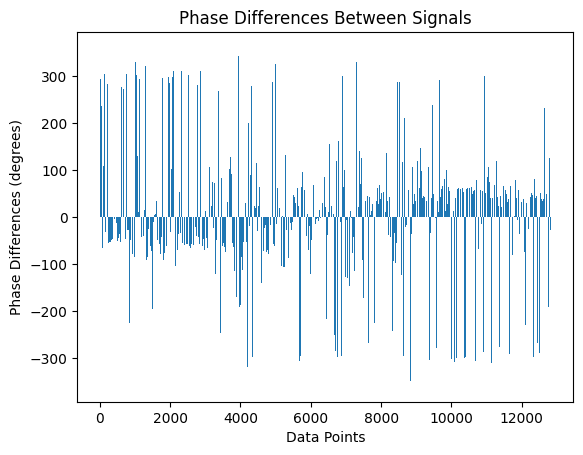

In [ ]:
x = np.arange(len(differen_phase_angle_yz))
plt.bar(x, differen_phase_angle_yz)
plt.xlabel('Data Points')
plt.ylabel('Phase Differences (degrees)')
plt.title('Phase Differences Between Signals')
plt.show()

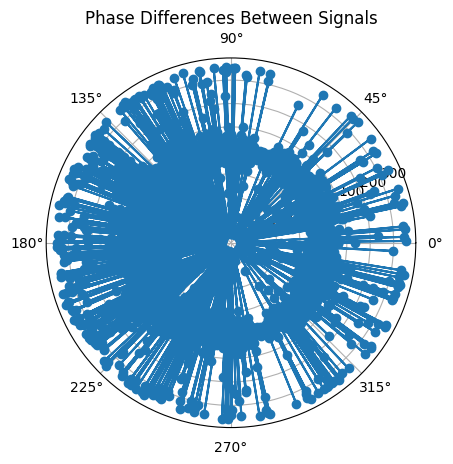

In [ ]:
theta = np.linspace(0, 2*np.pi, len(differen_phase_angle_xy))
plt.polar(theta, differen_phase_angle_xy, marker='o')
plt.title('Phase Differences Between Signals')
plt.show()

# Referências
- Kong, Siauw & Bayen. Python Programming And Numerical Methods: A Guide For Engineers And Scientists https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html